In [1]:
import pandas as pd
import numpy as np

In [2]:
index_df = pd.read_csv('index2.csv',sep=';')

In [3]:
print(index_df.columns)

index_df.describe()

Index(['path', 'folder', 'filename', 'size', 'pages'], dtype='object')


,size,pages
count,9.334000e+03,9334.000000
mean,1.198023e+06,7.487679
std,3.822602e+06,24.290158
min,0.000000e+00,0.000000
25%,1.590425e+05,1.000000
50%,3.736975e+05,3.000000
75%,9.396205e+05,7.000000
max,1.292368e+08,1363.000000


In [4]:
total_files = index_df.shape[0]
total_unique_files = index_df['filename'].unique().size
total_contracts = index_df['folder'].unique().size

#Obtenemos la cantidad de nombres de archivos
print("Cantidad de archivos: ", total_files)

#Obtenemos la cantidad de nombres de archivos (sin repetición)
print("Cantidad de nombres únicos: ", total_unique_files)

#Las carpetas son nombradas según el nombre del UID del contrato
print("Cantidad de contratos: ", total_contracts)

Cantidad de archivos:  9334
Cantidad de nombres únicos:  3171
Cantidad de contratos:  4657


In [5]:
#generamos el año del contrato partiendo del prefijo del nombre de la carpeta (el cual asumo es el UID del contrato)
index_df['Contract Year'] = index_df['folder'].str.slice(stop=2).astype(int)

#generamos la tabla
table1 = index_df.groupby('Contract Year',as_index=False)['filename'].count().rename(columns={'filename':'File Count'})
table1["% Total"] = table1['File Count'] *100 / total_files

#print(table1.sort_values(by='File Count', ascending=False).to_string(index=False))
table1.sort_values(by='File Count', ascending=False)


,Contract Year,File Count,% Total
7,20,8335,89.297193
6,19,859,9.202914
5,18,64,0.685665
4,17,28,0.299979
3,16,24,0.257124
2,15,12,0.128562
1,14,10,0.107135
0,12,2,0.021427


<h4>De la tabla anterior se puede ver:</h4>

- El año (según el prefijo del UID) que tiene mas archivos es el 2020 con 8.335 (89%). De estos, 2.656 son nombres de archivos únicos.
- La cantidad de archivos antes del 2018 corresponde solo al 2% de los archivos.

In [6]:
grpobj = index_df.groupby('folder',as_index=False)

table2 = grpobj['filename'].count()
table2['# Pages'] = grpobj['pages'].sum()['pages']
table2.rename(columns={'folder':'Contract', 'filename':'# File'}, inplace=True)

table2.sort_values(by='# File', ascending=False)

,Contract,# File,# Pages
432,20-1-210816--1,44,2091
330,19-22-7645-8736422,29,68
129,19-12-10185371-9306457,28,213
3255,20-21-19156--1,26,312
711,20-12-10429314-9577401,24,34
...,...,...,...
2750,20-13-10690184-9888036,1,14
1366,20-12-10919398-10063468,1,3
2753,20-13-10724363-9864077,1,1
2754,20-13-10724790-9873395,1,4


<h4>De la tabla anterior se puede ver:</h4>
- El contrato que mas tiene archivos tiene 44, y estos en total suman 2.091 paginas.

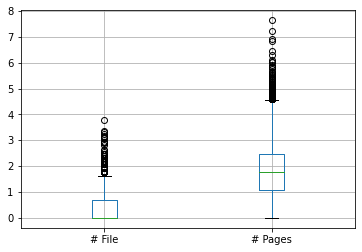

In [7]:
#testing 
table2_1 = table2.copy()
table2_1['# File'] = np.log(table2_1['# File'])
table2_1['# Pages'] = np.log(table2_1['# Pages'])

boxplot = table2_1.boxplot(column=['# File', '# Pages'])

In [8]:
grpobj = index_df.groupby('filename',as_index=False)

table3 = grpobj['path'].count().rename(columns={'filename':'Filename', 'path':'# Files'}).sort_values(by='# Files', ascending=False)
table3['% Total'] = table3['# Files'] * 100 / total_files

table3

,Filename,# Files,% Total
295,13-CONTRATO.PDF,594,6.363831
2931,43-ESTUDIOS PREVIOS.PDF,406,4.349689
659,19-ACTA DE INICIO.PDF,335,3.589029
2775,43-CDP.PDF,285,3.053353
2205,19-RP.PDF,202,2.164131
...,...,...,...
1147,19-CONVOCATORIA A VEERDURIAS.pdf,1,0.010714
1148,19-CONVOCATORIA PROCESO SU-002-2020.pdf,1,0.010714
1149,19-COTIZACION 2.pdf,1,0.010714
1151,19-COTIZACIONES E INFORME.pdf,1,0.010714
